In [1]:
import cv2 as cv
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# RGB to YUV conversion formula
### Y =  (0.299 * R) + (0.587 * G) + (0.114 * B) + 16
### U = (-0.168736 * R) - (0.331264 * G) + (0.5 * B) + 128
### V =  (0.5 * R) - (0.418688 * G) - (0.081312 * B) + 128

1.0292565 seconds


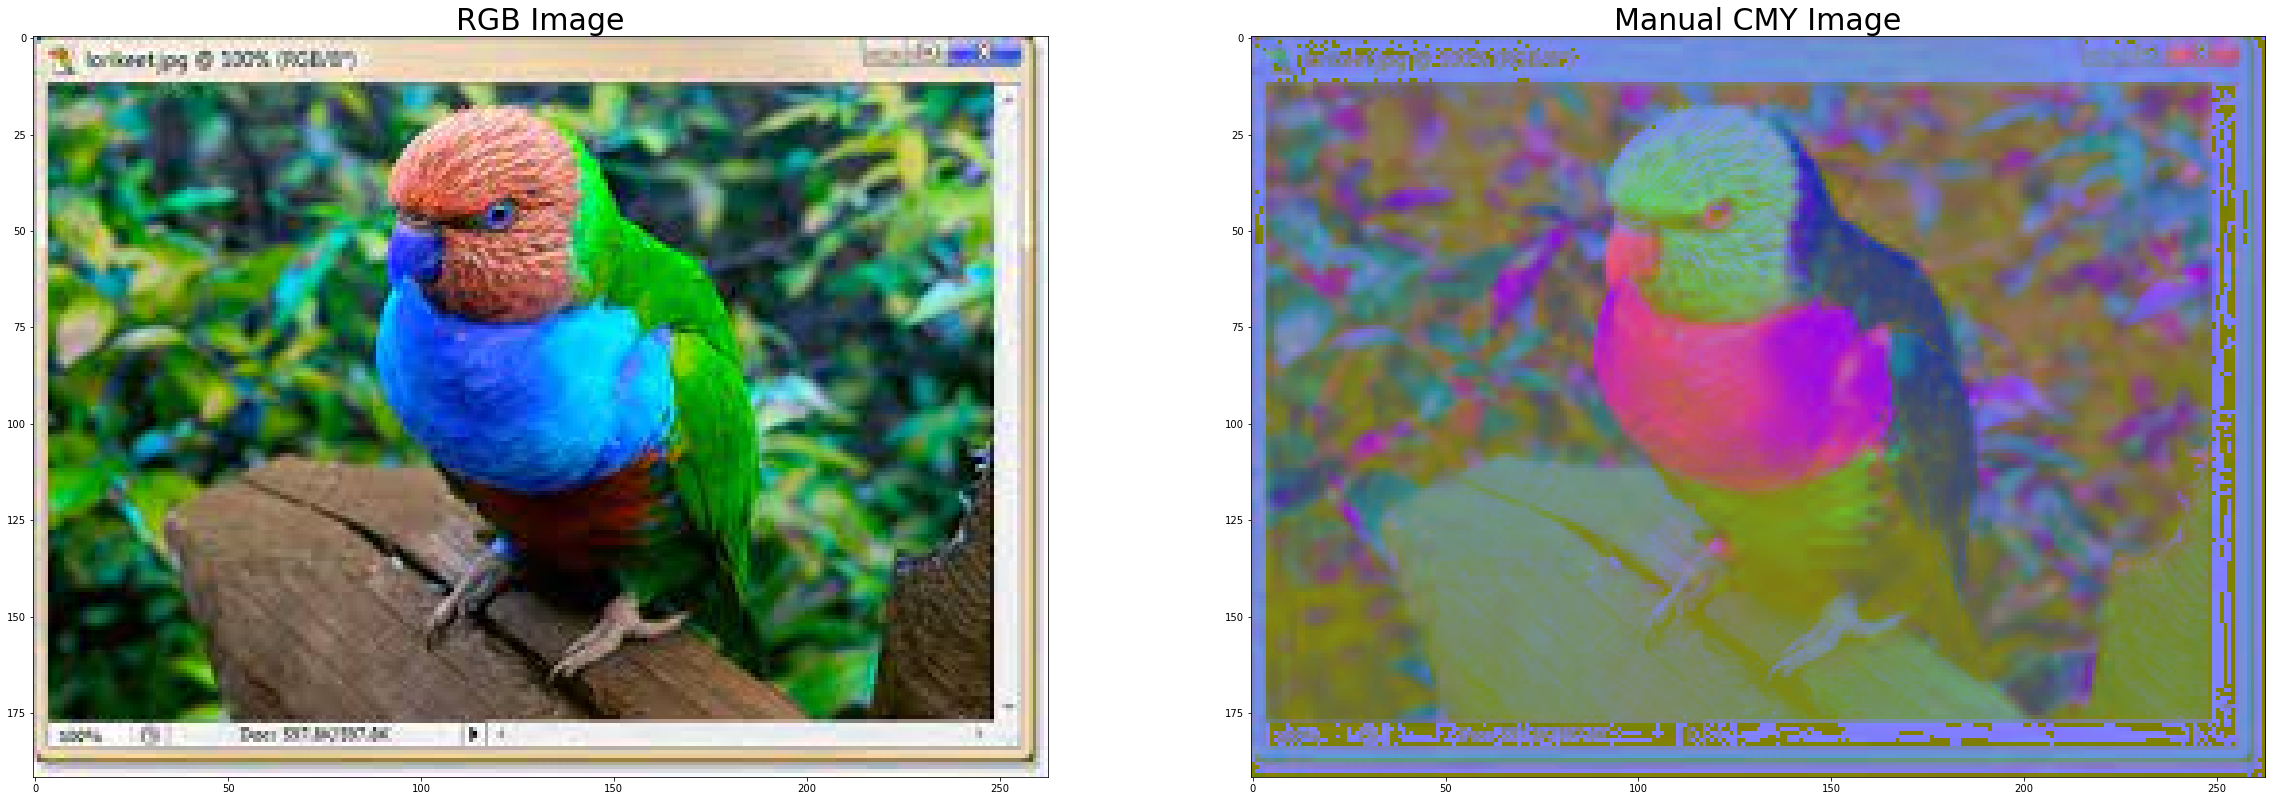

In [16]:
# Load Image
img_rgb = cv.imread("bird.jpg")

# Time calculation begins
e1 = cv.getTickCount()

# splitting the color channels of the image  and then normalizing
r, g, b = img_rgb[:,:,2], img_rgb[:,:,1], img_rgb[:,:,0]
R, G, B = r/ 255.0 , g/255.0, b/255.0

# create a dummy matrix with all values 0
yuv = img_rgb.copy()
yuv[:,:,:] = [0, 0 ,0]

# iterating through the image height and width
for i in range(img_rgb.shape[0]):
    for j in range(img_rgb.shape[1]):
        
        R = img_rgb[i,j,2]
        G = img_rgb[i,j,1]
        B = img_rgb[i,j,0]
        
        # Merge the final output to dummy matrix
        yuv[i,j,0] = (0.299 * R) + (0.587 * G) + (0.114 * B) + 16 
        yuv[i,j,1] = (-0.168736 * R) - (0.331264 * G) + (0.5 * B) + 128 
        yuv[i,j,2] = (0.5 * R) - (0.418688 * G) - (0.081312 * B) + 128 


# Time calculation ends
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
print(time, "seconds")


# plotting the results on grid
fig, axs = plt.subplots(2, 2, figsize = (40, 40))

plt.subplot(1, 2, 1)
plt.title("RGB Image", fontsize = 30)
plt.imshow(img_rgb)

plt.subplot(1, 2, 2)
plt.title("Manual CMY Image", fontsize = 30)
plt.imshow(cv.cvtColor(yuv, cv.COLOR_BGR2RGB))


# OR using opencv display

cv.imshow("Original Image", img_rgb)
k = cv.waitKey(0)

cv.imshow("YUV Image", yuv)
k = cv.waitKey(0)
